# Implementación manual Autómatas finitos NO deterministas (AFND)

**Autómatas y Lenguajes Formales**

**Profesor: Fabio Martínez**

**Escuela de Ingeniería de Sistemas e Informática**   

<br><br>
<span style="text-decoration:underline;">Ejecute estas dos celdas si se encuentra trabajando en Colaboratory:</span>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/automatas-uis-student/notebooks
!pwd

In [ ]:
!pip install automata-lib==1.0.0.post4

<br><br>

In [ ]:
#from automata.fa.nfa import NFA # Se importa la clase NFA (trabajando desde colaboratory)
from automatalib.fa.nfa import NFA # Se importa la clase NFA (trabajando desde virtualbox)

### Implementación  autómata finito NO determinista

- <b>Ejemplo A</b><br>
Se desea diseñar un AFND que acepte el lenguaje
 
$$L=\{w \mid w \text{ tiene un cero en la penúltima posición y un uno en la última posición}\}$$

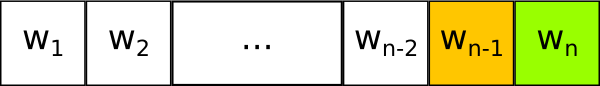

In [1]:
from IPython.display import Image
Image(filename='files/penultima.png', width=500)

<div style="text-align:center; font-style: italic;" class="image">
<div>Penúltima y última posición</div>
</div>
<br>

La tarea de los estados de este AFND es garantizar que al final de la palabra exista un cero, seguido de un uno. Debe contemplarse también la posibilidad de permitir cualquier cantidad de caracteres al principio de la palabra.
Por lo tanto existen tres estados interpretados de la siguiente forma:
- $q_0$: leer cualquier caracter, cero o uno, en cualquier cantidad. Igualmente, al ser un NFA, puede leer un cero para cumplir la primera condición del lenguaje.
- $q_1$: leer un uno, para cumplir la segunda condición del lenguaje.
- $q_2$: acepta la computación porque en este momento se cumplen todas las condiciones del lenguaje.

El estado $q_0$ será el estado incial, y $q_2$ el estado de aceptación. $q_0$ es el estado inicial porque en ese momento es posible que ingrese cualquier caracter, en cualquier cantidad que se presente. $q_2$ es el estado de aceptación porque describe de forma exacta la condición para que la penúltima posición tenga un cero y la última posición tenga un uno. Con esto se logra identificar las palabras que pertenecen al lenguaje $L$.

Ahora ya sabemos cómo especificar el AFND para el lenguaje $L$. Así

$$A=(\{q_0,q_1,q_2\},\{0,1\},\delta,q_0,\{q_2\})$$

donde la función de transición $\delta$ se describe mediante el diagrama de transiciones de la siguiente figura

In [2]:
from IPython.display import Image
Image(filename='files/AFND01.png', width=600)

<div style="text-align:center; font-style: italic;" class="image">
<div>Figura 1. Diagrama de transiciones del AFND 1</div>
</div>
<br>

## Implementación usando automata-lib

La implementación de autómatas no deterministas es casi igual a como se hizo con los autómatas deterministas en la práctica anterior, esta clase NFA es un modificación de la clase anterior, es por ello que recibe los mismo parámetros aceptando ya no un solo estado de transición para cada símbolo sino un conjunto de estados de transición para cada símbolo. 

A continuación se presenta el código del autómata que acepta el lenguaje del AFND 1:

In [ ]:
nfa1 = NFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': {'q0','q1'}, '1': {'q0'}}, # Conjunto de estados de transición
        'q1': {'1': {'q2'}},
        'q2': {}
    },
    initial_state='q0',
    final_states={'q2'}
)

In [ ]:
def checker(cadena,NFA):
    try:
        NFA.validate_input(cadena)
        return "La cadena es aceptada: sus estados visitados fueron:",[step for step in NFA.validate_input(cadena, step=True)]
    except Exception as e:
        print("Entrada no valida: \n", e) 

In [ ]:
print ("Es aceptada?:",checker("01010001",nfa1))

- <b>Ejemplo B</b><br>
Se desea diseñar un AFND que acepte el lenguaje
 
$$L=\{w \mid w \text{ tiene un uno en la antepenúltima posición}\}$$

In [3]:
from IPython.display import Image
Image(filename='files/antepenultima.png', width=500)

<div style="text-align:center; font-style: italic;" class="image">
<div>Antepenúltima posición</div>
</div>
<br>

La tarea de los estados de este AFND es garantizar que exista un uno, seguido de un caracter (0 ó 1), y un caracter adicional (0 ó 1). Debe contemplarse también la posibilidad de permitir cualquier cantidad de caracteres al principio de la palabra.
Por lo tanto existen cuatro estados interpretados de la siguiente forma:
- $q_0$: leer cualquier caracter, cero o uno, en cualquier cantidad. 
- $q_1$: leer un uno, hasta el momento se cumple la condición del lenguaje.
- $q_2$: leer UN caracter, puede ser cero o uno.
- $q_3$: leer UN caracter, puede ser cero o uno.

El estado $q_0$ será el estado incial, y $q_3$ el estado de aceptación. $q_0$ es el estado inicial porque en ese momento es posible que ingrese cualquier caracter, en cualquier cantidad que se presente. $q_3$ es el estado de aceptación porque describe de forma exacta la condición para que la antepenúltima posición tenga un uno, seguido de cualquier caracter y otro caracter. Con esto se logra identificar las palabras que pertenecen al lenguaje $L$.

Ahora ya sabemos cómo especificar el AFND para el lenguaje $L$. Así

$$A=(\{q_0,q_1,q_2,q_3\},\{0,1\},\delta,q_0,\{q_3\})$$

donde la función de transición $\delta$ se describe mediante el diagrama de transiciones de la siguiente figura

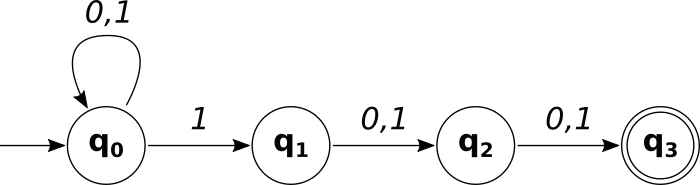

In [4]:
from IPython.display import Image
Image(filename='files/AFND02.png', width=600)

<div style="text-align:center; font-style: italic;" class="image">
<div>Figura 3. Diagrama de transiciones del AFND 2</div>
</div>
<br>

In [ ]:
nfa2 = NFA(
    states={'q0', 'q1', 'q2','q3'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': {'q0'}, '1': {'q0','q1'}}, # Conjunto de estados de transición
        'q1': {'0': {'q2'},'1':{'q2'}},
        'q2': {'0': {'q3'},'1':{'q3'}},
        'q3': {}
    },
    initial_state='q0',
    final_states={'q3'}
)

In [ ]:
# Prueba:
print ("Es aceptada:?",checker("1111110100",nfa2))

- <b>Ejemplo C</b><br>
Se desea diseñar un AFND que acepte el lenguaje
 
$$L=\{w \mid w \text{  contiene a 101 como subcadena}\}$$

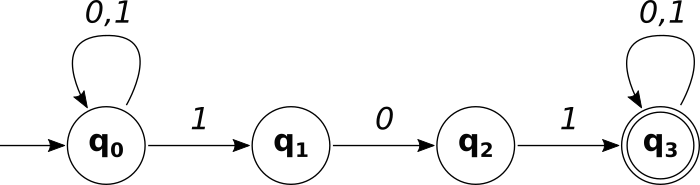

In [5]:
from IPython.display import Image
Image(filename='files/AFND03.png', width=600)

<br>
<div style="text-align:center; font-style: italic;" class="image">
<div>Figura 4. Diagrama de transiciones del AFND 3</div>
</div>
<br>

A continuación se presenta el código del autómata que acepta el lenguaje del AFND 3:

El método de validación es el mismo que el de validación para los DFA, es por ello que definimos nuevamente la función **checker** para los NFA de la siguiente manera:

In [ ]:
nfa3 = NFA(
    states={'q0', 'q1', 'q2','q3'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': {'q0'}, '1': {'q0','q1'}}, # Conjunto de estados de transición
        'q1': {'0': {'q2'}},
        'q2': {'1':{'q3'}},
        'q3': {'0':{'q3'},'1':{'q3'}}
    },
    initial_state='q0',
    final_states={'q3'}
)

In [ ]:
# Prueba:
print ("Es aceptada:?",checker("001010",nfa3))

<br><br><br>
<b>- Ejercicio en Clase</b><br>

Considere el siguiente AFND con $\Sigma \{a,b\}$ que acepta las palabras que comienzan con 'aa', contienen la subcadena 'baab' y terminan en 'ab':<br><br>
$$L = \{aawbaabwab : w \in \Sigma \}$$

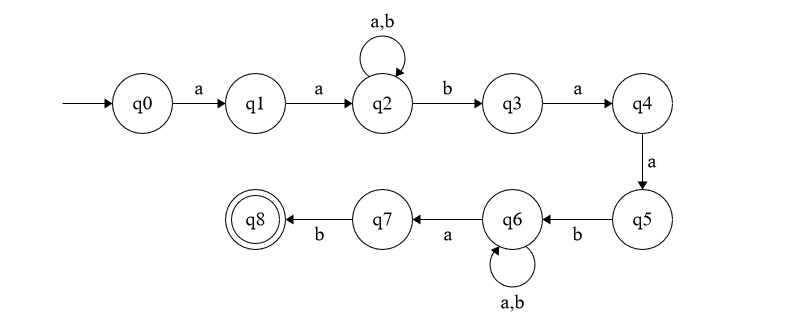

In [6]:
from IPython.display import Image
Image(filename='files/AFN5.png', width=720)


** Implemente el autómata utilizando el esquema explicado anteriormente. **

** Compruebe su funcionamiento con la palabra: aaababbaabbabaab **

In [ ]:
#Implemente su autómata aquí

In [ ]:
checker('aaababbaabbabaab',nfa4)